# AULA 7 - MAIS FUNÇÕES

Na última aula, aprendemos como definir e chamar funções que realizem um bloco de operações específico.
Esse é um recurso bastante importante e com muitas nuances. Desta forma, iremos continuar trabalhando com funções e suas diferentes formas de aplicação.
<br> <br>
**Exemplo 1** <br>
Considere a seguinte função: $f(x) = x^2 + 3*x - 2$ <br>
Vamos encontrar as raízes da função utilizandos as funções: <br>
a) _bisect_ <br>
b) _newton_ <br>
c) _fsolve_ <br>

In [31]:
# a)
import numpy as np
from scipy.optimize import bisect

def fun(x):
    f = x**2 + 3*x - 2
    return f

x1 = bisect(fun, -10, 0)
x2 = bisect(fun, 0, 10)
print("As duas raízes são:", x1,"e",x2)

As duas raízes são: -3.561552812808486 e 0.5615528128089409


<br>

Para o método da Bisseção, importamos a função _bisect_. A sintaxe básica dessa função é: <br>
_bisect(função, limite_inferior, limite_superior)_ <br>
Dessa maneira, na linha 9, invocamos a função _fun_ com o método da bisseção (_bisect_) com o intervalo de busca entre -10 e 0. A raiz encontrada será gravada na variável $x_1$. <br>
Na linha 10, invocamos a função _fun_, da mesma maneira, porém agora com o intervalo de busca entre 0 e 10. O resultado é gravado na variável $x_2$. <br>
Note que na linha 7, utilizamos "return f". Os métodos aqui utilizados são métodos de busca de raízes, portanto, buscam o zero de uma função, ou de um sistema de funções: $f(x) = 0$. Assim, ao utilizarmos _return f_, dizemos para a função que ela deve buscar alterar a variável $x$ (único argumento da função _fun_) até que a variável $f$ seja igual ou muito próxima a 0 (zero). <br>
<br>

In [33]:
# b)
import numpy as np
from scipy.optimize import newton

def fun(x):
    f = x**2 + 3*x - 2
    return f

x1 = newton(fun, -10)
x2 = newton(fun, 0)
print("As duas raízes são:", x1,"e",x2)

As duas raízes são: -3.56155281280883 e 0.5615528128088302


<br>
<br>

Para o método de Newton-Raphson, importamos a função _newton_. A sintaxe básica dessa função é: <br>
_newton(função, chute_inicial)_ <br> 
Iniciamos o código importando o _numpy_ e a função _newton_ da biblioteca _scipy.optimize_. <br>
Na linha 5, definimos a função _fun(x)_, a função que contém o polinômio. O valor da função $f(x)$ no ponto $x$ fica gravado na variável $f$, que será utilizado pelo método de Newton para encontrar o zero da função. <br>
Na linha 9, chamamos a função _fun_ através de _newton_ com chute inicial igual à $-10$. A resposta será atribuída à variável $x_1$. <br>
O mesmo acontece na linha 10, porém com um chute inicial igual à $0$. <br>
Note que diferentes chutes iniciais levam à soluções diferentes. <br>
<br>

In [35]:
# c)
import numpy as np
from scipy.optimize import fsolve

def fun(x):
    f = x**2 + 3*x - 2
    return f

x1 = fsolve(fun, -10)
x2 = fsolve(fun, 0)
print("As duas raízes são:", x1,"e",x2)

As duas raízes são: [-3.56155281] e [0.56155281]


<br>
<br>

Por fim, para o método _fsolve_, que representa o método de Powell modificado, temos também a sintaxe: <br>
_fsolve(função, chute_inicial)_ <br>
<br>
<br>
Estas são algumas das funções que nos serão mais úteis na resolução de equações e sistemas de equações algébricas não-lineares. No entanto, o módulo de Otimização (_scipy.optimize_) do SciPy possui diversas outras opções. <br>
Veja algumas outras funcionalidades desse módulo em https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html. <br>
<br>

**Exemplo 2** <br>
Considere uma mistura líquida contendo 50% de pentano (1), 30% de n-hexano (2) e 20% de ciclohexano (3) (em base molar). <br>
Para separar o pentano, um tanque flash operando a 5 bar é utilizado. <br>
a) Qual a temperatura de bolha do sistema? <br>
b) Qual a composição nesta temperatura? <br>
Dados: <br>
Constantes de Antoine: <br>
A = [3.97786 4.00139  3.93002] <br>
B = [1064.84 1170.875 1182.774] <br>
C = [-41.136 -48.833 -52.532] <br>
<br>
_Resolução_: <br>
a) Tratando-se de um tanque flash e supondo fases gás e líquida como ideais, temos $y_i P = P_i = x_i P^{sat}_i$ <br>
Somando para os três componentes (e lembrando que $\sum {y_i} = 1$), temos: $P = \sum {x_i P^{sat}_i}$ <br>
ou ainda <br>
$0 = P - \sum {x_i P^{sat}_i}$ <br>
Olhando para a equação acima, temos as variáveis $P$ e $x_i$ que são conhecidas e $P^{sat}_i$, que é um função da temperatura. Assim, nossa única incógnita é $T$. <br>
<br>
b) Tendo-se encontrado a temperatura de bolha do sistema, podemos calcular a composição na fase vapor com  $y_i = \frac {P_i} {P} = \frac {x_i P^{sat}_i} {P}$


In [28]:
import numpy as np
from scipy.optimize import newton
def main():
    NC = 3 # Número de componentes
    P  = 5 # Pressão [bar]
    x = np.array([0.5, 0.3, 0.2]) # Frações molares na fase líquida
    # Coeficientes de Antoine
    A = np.array([3.97786, 4.00139,  3.93002])
    B = np.array([1064.84, 1170.875, 1182.774])
    C = np.array([-41.136, -48.833, -52.532])
    # Cálculo da temperatura (a)
    T0 = 300; # Chute inicial
    T = newton(flash,T0,args=[NC,P,x,A,B,C])
    
    # Cálculo da composição na fase vapor (b)
    Psat = np.zeros(3)
    Pi = np.zeros(3)
    y=np.zeros(3)        
    for i in np.arange(NC):
        Psat[i] = 10**(A[i] - B[i]/(T+C[i]))
        Pi[i] = Psat[i]*x[i]
        y[i] = Pi[i]/P
    
    print("O sistema está a",T,"[K].")
    print("As frações molares na fase vapor são:",y)
    
def flash(T,NC,P,x,A,B,C):
    F = 0
    Psat = []
    for i in np.arange(NC):
        Psat.append(10**(A[i] - B[i]/(T+C[i])))
        F = x[i]*Psat[i] + F
    f = F-P
    return f

main()

O sistema está a 382.63921924543115 [K].
As frações molares na fase vapor são: [0.72404153 0.18702187 0.08893659]


<br>
<br>
No Exemplo acima definimos duas funções: a função principal _main_ e a função auxiliar para o cálculo de equilíbrio no tanque _flash_. <br>
A função principal _main()_ não necessita de nenhum argumento de entrada, dessa maneira ela poderá ser invocada apenas com o comando _main()_ (vide última linha do código). A função _flash_, no entanto, possui diversos argumentos de entrada: o argumento principal $T$, que será calculado pela função _newton_, e os demais argumentos "extras" (args=(NC,P,x,A,B,C)). <br>
Assim, as duas funções são definidas, mas nenhuma delas é executada até que o programa chegue à linha 36 _main()_. Quando o programa executa _main()_, a função principal será executada. <br>
A função principal inicia definindo o número de componentes na mistura, a pressão do sistema, as frações molares da fase líquida e os coeficientes de Antoine (linhas 4-10). <br>
Na linha 12 definimos um chute inicial para o método de Newton, que será chamado na linha seguinte. Assim, na linha 13 utilizamos a função _newton_, pertencente à biblioteca _scipy.optimize_, para encontrar a raiz da função, ou seja, para encontrar a temperatura do ponto de bolha do sistema. <br>
A função _newton_ irá chamar a função _flash_ com um chute inicial $T_0$ e com os argumentos $NC, P, x, A, B$ e $C$. <br>

É importante que os argumentos na chamada da função (args=[ ]) estejam na mesma ordem daqueles na definição da função ( _flash(T,NC,P,x,A,B,C)_). <br>
Dentro do bloco da função _flash_, introduzimos um loop para calcular a pressão de saturação $P^{sat} _i$ de cada componente bem como sua contribuição proporcional para a pressão          $x_i P^{sat} _i$. <br>
É importante que se adicione a linha _return f_, pois essa é a maneira do programa entender que o método de Newton deve zerar _f_. Alternativamente, as linhas 33 e 34 poderiam ser substituídas por apenas _return F-P_. <br>
A função _newton_ irá ser executada até que se encontre uma solução. Ao se encontrar a raiz da função, o programa retorna para a função principal e atribui a resposta à variável $T$ (linha 13). <br>
Agora, de posse da temperatura do ponto de bolha, pode-se proceder aos cálculos das frações molares da fase vapor. Neste caso, criamos os vetores Psat, Pi e y com o tamanho 3 para que recebam os respectivos valores de cada componente da mistura. <br>
<br>
**Exemplo 3** <br>
Um experimento para medir a taxa de crescimento de certos microrganismos demanda um ambiente com ar úmido enriquecido em oxigênio. Para isso, três correntes de entrada são alimentadas a uma câmara de evaporação para produzir uma corrente de saída com a composição desejada. <br>
A taxa de alimentação de água é de $20 \ cm^3/min$. <br>
A composição aproximada do ar é de 21% $O_2$ e 79% $N_2$. <br>
Oxigênio puro, com uma taxa de alimentação igual a um quinto da alimentação na corrente B é alimentado em A. <br>
O gás de saída deve conter 1.5% molar de água. <br>
Com base nos dados e na figura abaixo, calcule as variáveis $\dot{n}_1$, $\dot{n}_2$, $\dot{n}_3$ e $y$. <br>
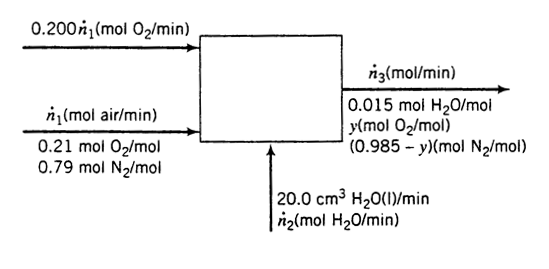 <br>
<br>
_Resolução_: <br>
Balanços por componentes: <br>
* Balanço para $O_2$: <br>
$0.2 \ \dot{n}_1 + 0.21 \ \dot{n}_1 = y \ \dot{n}_3$ <br>
* Balanço para $N_2$: <br>
$0.79 \ \dot{n}_1 = (0.985-y) \ \dot{n}_3$ <br>
* Balanço para $H_2O$: <br>
$\dot{n}_2 = 0.015 \ \dot{n}_3$ <br>
* Fluxo de $H_2 O \ (cm^3/min \rightarrow mol_{H_2O}/min)$: <br>
$\dot{n}_2 = 20/MW_{H_2 O}$ <br>

In [9]:
import numpy as np
from scipy.optimize import fsolve
def oxywater(x):
    f = [0.2*x[0] + 0.21*x[0] - x[2]*x[3],
         0.79*x[0] - (0.985 - x[3])*x[2],
         x[1] - x[2]*0.015,
         x[1] - 20/18.02]
    return f

def main():
    x0 = [100, 100, 100, 0.5]
    x = fsolve(oxywater,x0)
    print(x)
    
main()

[60.73498582  1.10987791 73.9918609   0.33654167]


O problema acima resultou em um sistema de equações algébricas. Assim, a função deve retornar um vetor resposta. Vejamos como o código foi implementado. <br>
Nas primeiras linhas importamos as bibliotecas de interesse. <br>
Na linha 3 iniciamos a definição da função _oxywater_, que irá conter as equações do sistema (balanços molares). Como possuímos 4 incógnitas ($x[0], x[1], x[2]$ e $x[3]$), precisamos de 4 equações para o sistema ser determinado. As quatro equações são inseridas como partes do vetor _f_. Assim, _f_ recebe todas as equações (note o uso de colchetes no início e fim, denotando um vetor e cada vírgula separando cada elementos do sistema) que serão resolvidas e podemos utilizar o comando _return f_ para retornar a resposta para o código. <br>
Na função principal, definimos os chutes iniciais pra cada uma das quatro variáveis (linha 11) e depois utilizamos esses chutes iniciais para resolver a função _oxywater_ através do método _fsolve_. <br>
<br>
**Exemplo 4** <br>
Em diversos problemas de Engenharia Química, iremos necessitar fazer ajustes de parâmetros para descrever dados. <br>
Suponhamos que obtivemos os seguintes dados em um experimento de reação em batelada de primeira ordem:
<br>


| Tempo [min] | 0 | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- | --- | 
| $C_A$ [$kg/mol$] | 8.47 | 5.00 | 2.95 | 1.82 | 1.05 | 0.71| <br>
<br>

Sendo o modelo fenomenológico representado por $ln ( {C_A} ) = ln ( {C_{A0}} ) + kt$ <br>
O modelo acima pode ser reescrito como $y = c_0 \ t + c_1$, assim podemos utilizar a função de mínimos quadrados do módulo de Álgebra Linear do pacote SciPy para ajustar os parâmetros $c_0$ e $c_1$ aos dados experimentais. <br>
Além disso, iremos ajustar os dados a um polinômio de 2$^a$ ordem para comparar os resultados. <br>

Parâmetros: [-0.50171474  2.10977185]
Resíduos: 0.007453802876621989
Parâmetros2: [ 0.01052511 -0.5543403   2.14485555]
Resíduos2: 0.00331809202786228


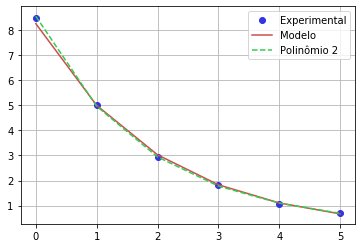

In [40]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def main():
    t = np.arange(0,6,1)
    Ca_exp = [8.47, 5.00, 2.95, 1.82, 1.05, 0.71]
    A = np.c_[t, np.ones((t.size,1))]
    # y = c0*t**2 + c1*t + c2*1
    A2 = np.c_[t**2, t, np.ones((t.size,1))]
    c, resid, rank, sigma = linalg.lstsq(A,np.log(Ca_exp))
    c2, resid2, rank2, sigma2 = linalg.lstsq(A2, np.log(Ca_exp))

    print("Parâmetros:",c)
    print("Resíduos:",resid)
    print("Parâmetros2:",c2)
    print("Resíduos2:",resid2)
    Ca = linear(c,t)
    plt.plot(t,Ca_exp,'o',color=[0.2, 0.2, 0.9])
    plt.plot(t,Ca,'-',color=[0.8, 0.3, 0.3])
    Ca = polinomio2(c2,t)
    plt.plot(t,Ca,'--',color=[0.2, 0.8, 0.3])
    plt.grid(color=[0.7,0.7,0.7])
    plt.legend(['Experimental','Modelo','Polinômio 2'])

def linear(c,t):
    Ca = np.exp(c[1]+c[0]*t)
    return Ca

def polinomio2(c2,t):
    Ca = np.exp(c2[0]*t**2 + c2[1]*t + c2[2])
    return Ca

main()

No exemplo acima, iniciamos importando os módulos necessários ao programa, dentre eles importamos o módulo de Álgebra Linear (_linalg_) da biblioteca do SciPy. Esse módulo será utilizado para realizar o ajuste linear dos parâmetros utilizando os dados experimentais ($C_A (t)$). <br>
Nas linhas 6 e 7 os dados experimentais (uma concentração de A a cada ponto no tempo). <br>
Nas linhas 8 e 9, definimos a matriz A. Essa matriz irá mudar para cada um dos dois modelos, no caso do modelo linear, A será um vetor de valores correspondentes à variável que acompanha o parâmetro a ser estimado, assim, olhando para a equação $y = c_0 t + c_1$, notamos que o vetor $t$ acompanha o parâmetro $c_0$ e o parâmetro $c_1$ pode ser visto como acompanhado do escalar 1. Assim, utilizamos a função _np.c__ para concatenar o vetor t com um vetor de mesmo tamanho de 1's. Da mesma maneira, na linha seguinte, utilizamos _np.c__ para concatenar os vetores $t^2$, $t$ e $1$ ($y=c_0 t^2 + c_1 t + c_2$). <br>
Com a função de mínimos quadrados do módulo de Álgebra Linear _linalg.lstsq_ e utilizando a matriz A (de cada caso) e os dados experimentais, podemos fazer o ajuste dos parâmetros do modelo. A função de mínimos quadrados possui a seguinte sintaxe: <br>
_parâmetros, erros_residuais, ranking, sigma = linalg.lstsq(matriz_variável_independente, dados_experimentais)_ <br>
Assim, olhando as linhas 10 e 11, percebemos que estamos obtendo os parâmetros $c$ (e também _resid_, _rank_ e _sigma_) através da função _linalg.lstsq_ ajustados para o modelo (A) e dados experimentais disponíveis ($ln (C_{A,exp})$). <br>
Após a obtenção dos parâmetros nas linhas 10 e 11, utilizamos esses parâmetros nos modelos respectivos (funções _linear_ e _polinomio2_) para calcular os valores de $C_A$ com cada modelo e depois compará-los com os dados experimentais.

**EXERCÍCIOS** <br>
<br>
**1.** Considere o circuito da figura abaixo, idêntico ao que vimos na Aula 4:

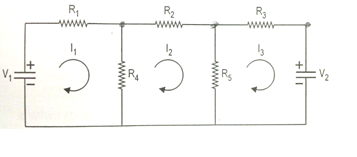

Dados os valores de <br>
               $V_1 = 10 V$, $V_2 = 5 V$, $R_1 = 1 \Omega$, $R_2 = 2 \Omega$, $R_3 = 3 \Omega$, $R_4 = 4 \Omega$ e $R_5 = 5 \Omega$ <br>
encontre a intensidade de cada corrente utilizando a função do método de Newton. <br>
<br>
$R_1 I_1 + R_4 I_1 - R_4 I_2 = V_1$ <br>
$-R_4 I_1 + R_2 I_2 + R_4 I_2 + R_5 I_2 - R_5 I_3 = 0$ <br>
$-R_5 I_2 + R_3 I_3 + R_5 I_3 = -V_2$ <br>

<br>
<br>

**2.** Você trabalha em uma empresa de gás mineral e precisa propor um modelo para descrever a variação da capacidade calorífica do gás para uma enorme faixa de temperatura (298.15K a 1298.15K). Assim, você realiza experimentos para medir a capacidade calorífica do gás sob diferentes temperaturas e os dados obtidos são salvos em um arquivo DADOS.txt, cuja primeira coluna se refere à temperatura e a segunda ao $C_p$ medido naquela temperatura. <br>
O modelo escolhido é um modelo polinomial de segunda ordem: $C_p / R = A + BT + CT^2$ <br>
a) Encontre os valores dos parâmetros. <br>
b) Faça um gráfico com os dados experimentais (representados por pontos) e o modelo com os parâmetros ajustados (representado por linha). <br>

<br>
<br>

**3.** Um reator em estado estacionário pode ser descrito em sua forma adimensional pelo seguinte sistema de equações:
$$f_1 (x_A, \gamma) = 1 - x_A [1 + \theta _R exp(-\Delta E_R / \gamma)]$$ <br>
$$f_2 (x_A, \gamma) = (1 - \gamma) + \beta (\gamma _C - \gamma) + \Delta h_R x_A \theta _R exp(-\Delta E_R / \gamma)$$ <br>
Encontre os valores de $x_A$ e $\gamma$ que satisfaçam o sistema de equações. <br>
Utilize dois métodos diferentes (por exemplo, _fsolve_ e _brenth_). <br>
Dados: <br>
$\theta _R = 50$ <br>
$\Delta E_R = 10$ <br>
$\Delta h_R = 10$ <br>
$\beta   = 1$ <br>
$\gamma _C = 1$ <br>